In [1]:
# c(q) = 2exp(-0.5q)
c(q) = 0.5 + q*(1-q*exp(-q))
p(q) = -2(log(q)-log(2))
π(q) = q*p(q) - c(q)

π (generic function with 1 method)

In [2]:
qvec = range(0.0001,3; length=100)
# πvec = [π(e) for e in qvec]
πvec = π.(qvec);

In [5]:
function grid_search(f, a, b, N)
    # looks for the optimal on N+1 points grid
    i0 = -1 # keeps index of the optimal
    f0 = -10000
    for n = 1:N
        xi = a + (b-a)*(n-1)/(N-1)
        fi = f(xi)
        if fi>f0
            f0 = fi
            i0 = n
        end
    end

    η = (b-a)/N
    #return optimal x
    return a + (b-a)*(i0-1)/(N-1)
end

grid_search (generic function with 1 method)

In [6]:
res =  grid_search(π, 0.00001, 2, 10000)

0.5618633763376337

In [1]:
using Plots

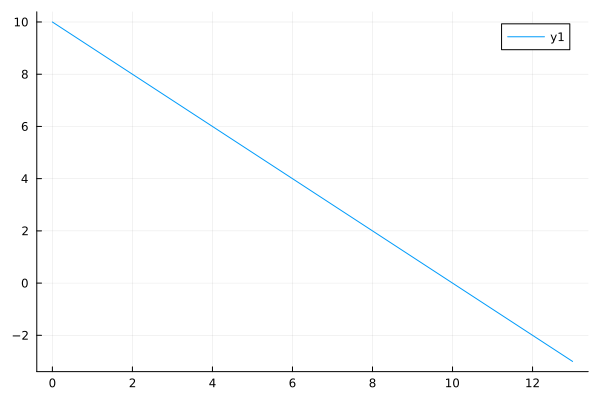

In [2]:
fun_bisection(x) = 10 - 1*x
xvec = range(0,13, length=1000)
plot(xvec,fun_bisection.(xvec))

In [19]:
function bisection(; N=1000, τ_ϵ=1e-8)
    
    a = 0
    b = 15
    
    for n in 1:N
        
        c = (a + b)/2
        ϵ = abs(fun_bisection(c))
        
        if ϵ < τ_ϵ
            cstar = c
            break
        end
        
        if fun_bisection(c) * fun_bisection(a) < 0
            a = a
            b = c
        else
            a = c
            b = b
        end

    end

    return fun_bisection(cstar)
end

bisection (generic function with 1 method)

In [20]:
bisection()

10

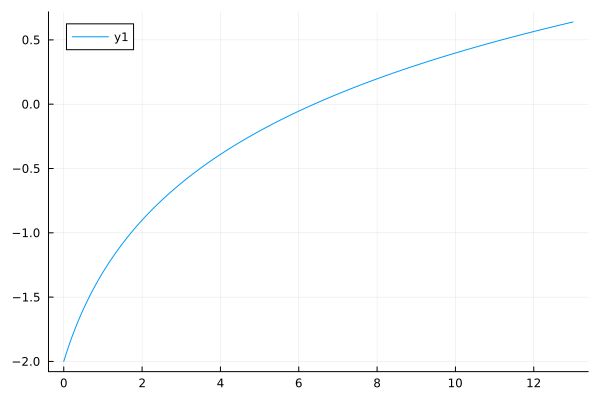

In [90]:
fun_newton(x) = -log(x) + 2 - x
fun_newton(x) = x * tanh(x) - 1
fun_newton(x) = log(x + 1) - 2

plot(xvec, fun_newton.(xvec))

In [91]:
import ForwardDiff: gradient

In [94]:
function zero_newton(x0, backtracking=true; N=1000, K=20, τ_ϵ=1e-8, τ_η=1e-8)
    x = [x0]
    
    for n in 1:N

        xprime = x[end] - fun_newton(x[end])/ForwardDiff.derivative(fun_newton, x[end])

        if backtracking == true
            
            step = - fun_newton(x[end])/ForwardDiff.derivative(fun_newton, x[end])

            for k in 1:K
                if abs(fun_newton(x[end]-step/2^k)) < abs(fun_newton(x[end]))

                    xprime = x - step/2^k
                    break
                    
                end            
            end
        end
        
        push!(x, xprime)

        ϵ = abs(fun_newton(x[end]))
        η = abs(x[end] - x[end-1])
        
        if ϵ < τ_ϵ || η < τ_η
            break
        end
    end
    return x
end

zero_newton (generic function with 3 methods)

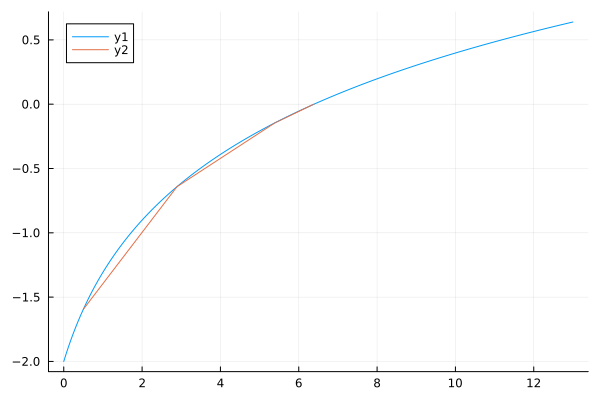

In [96]:
hist = zero_newton(0.5)
plot(xvec, fun_newton.(xvec))
plot!(hist, fun_newton.(hist))

In [ ]:
function min_gd()
    
end

In [ ]:
function min_nr()
    
end

In [ ]:
function zero_newton(f::Function, x0::Vector{Float64})
    
end